In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import warnings
import numpy as np

In [ ]:
file_path ='/content/drive/MyDrive/Copy of CompleteDataset.xlsx'
df = pd.read_excel(file_path)
df.head()

,Label,Area,Spine Density,Number of Primary Dendrite,Number of Secondary Dendrites,Mean Length of primary dendrites,Mean Length of secondary dendrites
0,384-N7 Below,67.550,1.25,5,9,40.71,70.86
1,281-N2 Right,71.208,1.98,7,9,42.10,70.53
2,Green-N1,73.000,1.22,6,8,36.50,92.50
3,Green-N3,84.250,2.68,9,15,40.96,69.38
4,384-N2,89.520,2.84,8,13,49.62,71.60


In [ ]:
labels = df['Label']
neurons = df.drop('Label', axis=1)
neurons.head()

,Area,Spine Density,Number of Primary Dendrite,Number of Secondary Dendrites,Mean Length of primary dendrites,Mean Length of secondary dendrites
0,67.550,1.25,5,9,40.71,70.86
1,71.208,1.98,7,9,42.10,70.53
2,73.000,1.22,6,8,36.50,92.50
3,84.250,2.68,9,15,40.96,69.38
4,89.520,2.84,8,13,49.62,71.60


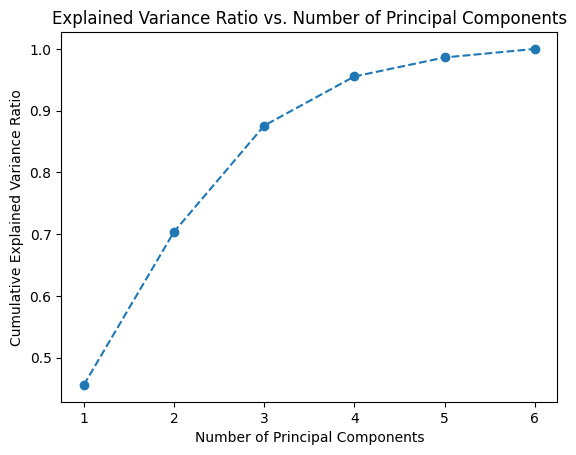

In [ ]:
#PCA
# Standardize the features
scaler = StandardScaler()
neurons_standardized = scaler.fit_transform(neurons)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(neurons_standardized)

explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [ ]:
print(explained_variance_ratio.cumsum())

[0.45574021 0.70368353 0.87573765 0.95538579 0.98616528 1.        ]


In [ ]:
# 4 componenets allow us to retain 95% of the variance
n_components = 4

# Redo PCA with the chosen number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(neurons_standardized)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

final_df = pd.concat([principal_df], axis=1)

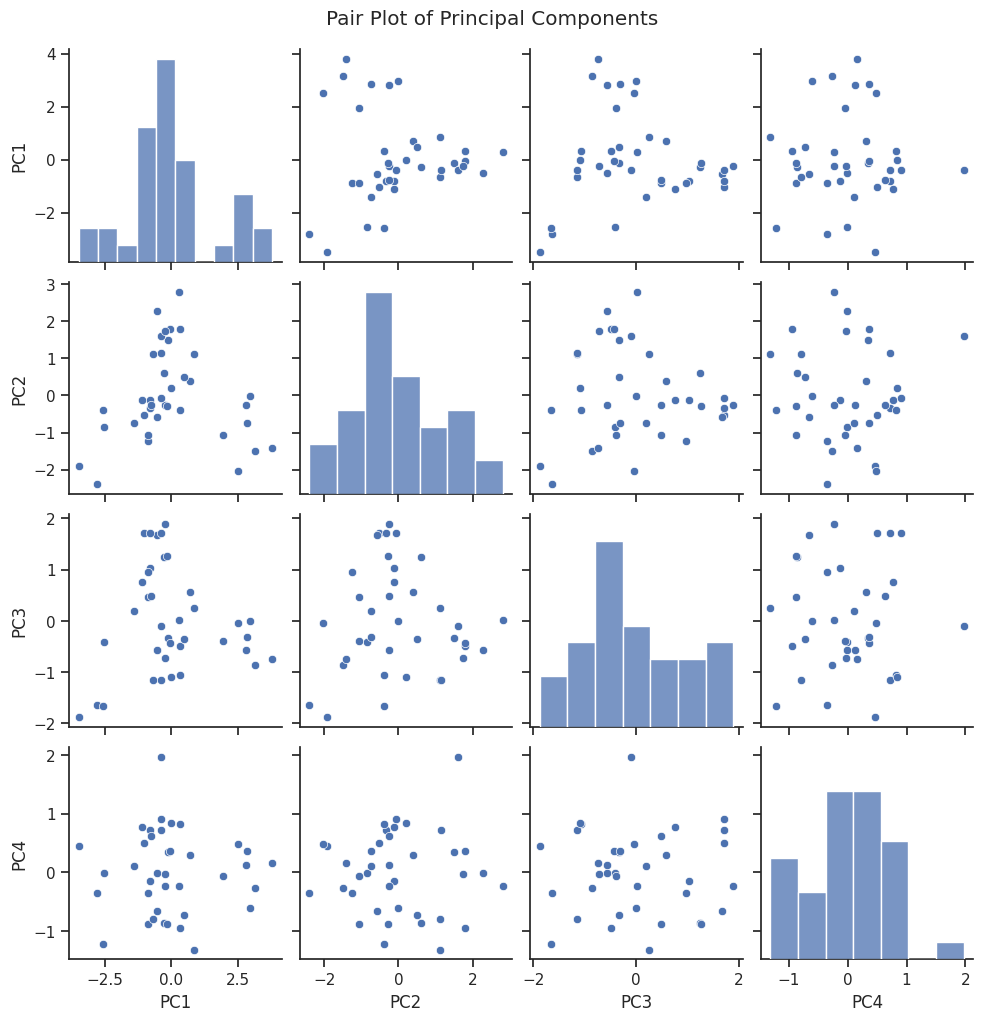

In [ ]:
# Plotting the pair plot for the principal components
sns.set(style="ticks")
sns.pairplot(principal_df)
plt.suptitle('Pair Plot of Principal Components', y=1.02)
plt.show()

In [ ]:
# Get the loadings for each principal component
loadings = pca.components_
chosen_component_index = 3
chosen_component_loadings = loadings[chosen_component_index]

loadings_df = pd.DataFrame(chosen_component_loadings, index=neurons.columns, columns=['Loading'])
sorted_loadings_df = loadings_df.abs().sort_values(by='Loading', ascending=False)

print("Sorted Loadings for the Chosen Principal Component:")
print(sorted_loadings_df)

Sorted Loadings for the Chosen Principal Component:
                                     Loading
Number of Primary Dendrite          0.614623
Number of Secondary Dendrites       0.602233
Spine Density                       0.446091
Mean Length of primary dendrites    0.179392
Mean Length of secondary dendrites  0.119501
Area                                0.118719


In [ ]:
warnings.filterwarnings('ignore')
min_clusters = 2
max_clusters = 10

silhouette_scores_with_pca = []
num_clusters_list_with_pca = []

for num_clusters in range(min_clusters, max_clusters + 1):
  silhouette_scores_for_cluster = []
  for _ in range(1000):
    kmeans = KMeans(n_clusters=num_clusters, random_state=None)
    kmeans.fit(principal_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(principal_df, labels)
    silhouette_scores_for_cluster.append(silhouette_avg)
  avg_silhouette_score = np.mean(silhouette_scores_for_cluster)
  silhouette_scores_with_pca.append(avg_silhouette_score)
  num_clusters_list_with_pca.append(num_clusters)

In [ ]:
warnings.filterwarnings('ignore')
silhouette_scores_no_pca = []
num_clusters_list_no_pca = []

for num_clusters in range(min_clusters, max_clusters + 1):
  silhouette_scores_for_cluster = []
  for _ in range(1000):
    kmeans = KMeans(n_clusters=num_clusters, random_state=None)
    kmeans.fit(neurons_standardized)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(neurons_standardized, labels)
    silhouette_scores_for_cluster.append(silhouette_avg)
  avg_silhouette_score = np.mean(silhouette_scores_for_cluster)
  silhouette_scores_no_pca.append(avg_silhouette_score)
  num_clusters_list_no_pca.append(num_clusters)

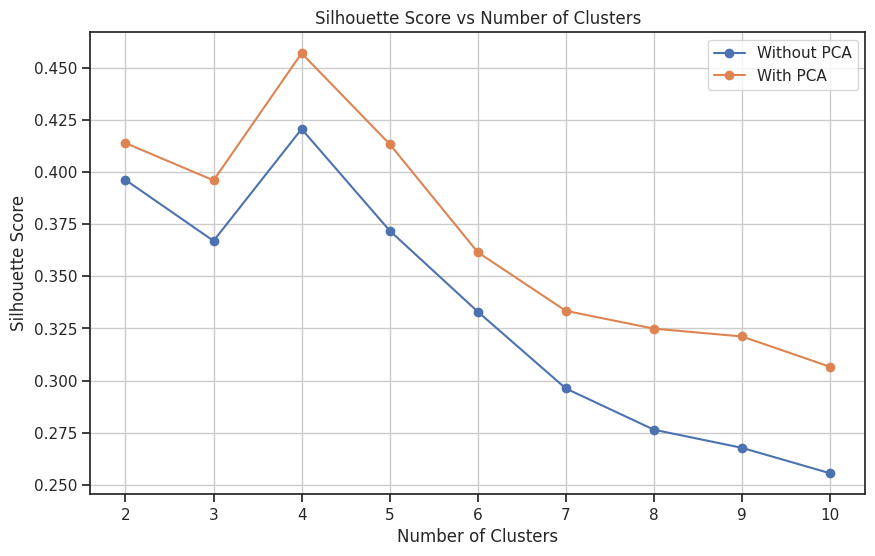

In [ ]:
plt.figure(figsize=(10, 6))

# Plot silhouette scores without PCA
plt.plot(num_clusters_list_no_pca, silhouette_scores_no_pca, marker='o', label='Without PCA')

# Plot silhouette scores with PCA
plt.plot(num_clusters_list_with_pca, silhouette_scores_with_pca, marker='o', label='With PCA')

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(silhouette_scores_no_pca)
print(silhouette_scores_with_pca)

[0.3961870985029957, 0.36696854436655746, 0.4205909010613633, 0.371869481962099, 0.3330523996550815, 0.2962491244807172, 0.2764828188304414, 0.2677932753256907, 0.2556120058913683]
[0.41386271879581366, 0.39597712569567717, 0.4568951132542985, 0.41335117898429996, 0.3615383771103789, 0.33344444978834087, 0.3249125340374287, 0.3211724561115403, 0.30664656622075925]


In [ ]:
Labels = ["N1", "N2", "N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16","N17","N18","N19","N20","N21","N22","N23","N24","N25","N26","N27","N28","N29","N30","N31","N32","N33","N34","N35","N36","N37","N38"]

In [ ]:
kmeans_with_pca = KMeans(n_clusters=4, random_state=None)
kmeans_with_pca.fit(principal_components)
labels_with_pca = kmeans_with_pca.labels_
# Add cluster labels to the dataframe
principal_df['Cluster_Labels'] = labels_with_pca

labels_series = pd.Series(Labels, name='Neuron')

# Concatenate neuron names with dataframe
df_with_names = pd.concat([labels_series, principal_df], axis=1)

# Export dataframe with cluster labels and neuron names to a CSV file
df_with_names.to_csv('clustered_dataRA.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


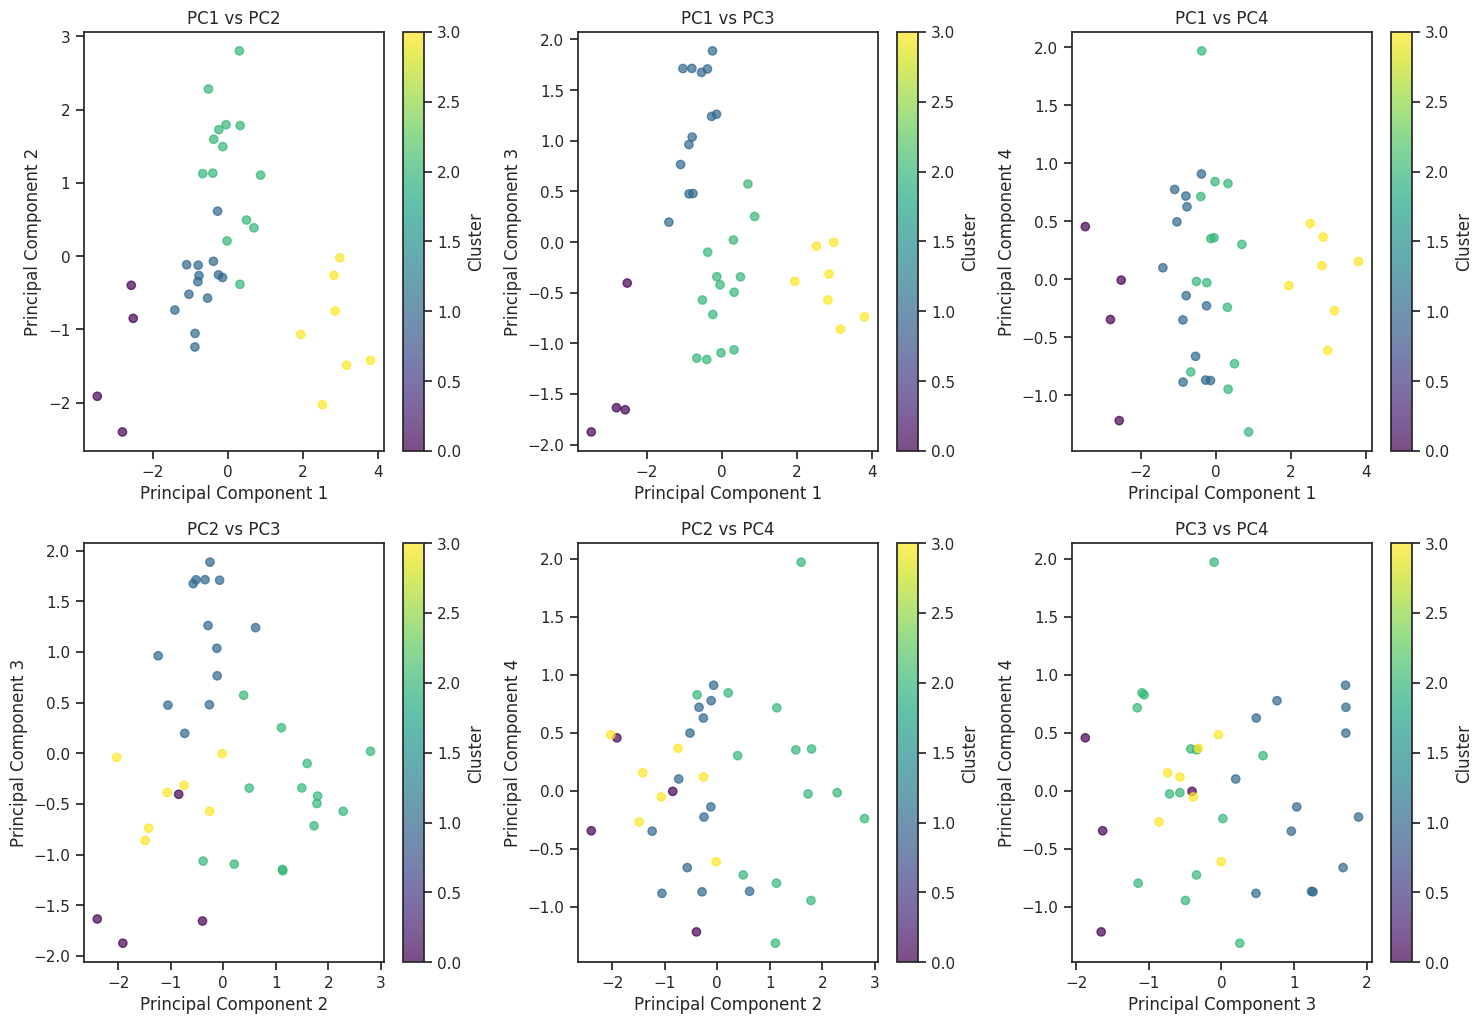

In [ ]:
import itertools

# Generate all pairs of principal components
pairs = list(itertools.combinations(range(principal_components.shape[1]), 2))

# Visualize clusters with PCA for all pairs of principal components
plt.figure(figsize=(15, 15))
for i, (pc1, pc2) in enumerate(pairs, 1):
  plt.subplot(3, 3, i)
  plt.scatter(principal_components[:, pc1], principal_components[:, pc2], c=labels_with_pca, cmap='viridis', alpha=0.7)
  plt.title(f'PC{pc1 + 1} vs PC{pc2 + 1}')
  plt.xlabel(f'Principal Component {pc1 + 1}')
  plt.ylabel(f'Principal Component {pc2 + 1}')
  plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()